## **Credit Card Risk Analysis**

In [3]:
# importing all the relevant libraries
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"Credit_default_dataset.csv")
# get a view of the data
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


This research employed a binary variable, **default payment** (Yes = 1, No = 0), as *the response variable*.

The dataset has the 23 variables as the explanatory variables or *the predictive variables*:
- **X1:** Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- **X2:** Gender (1 = male; 2 = female).
- **X3:** Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- **X4:** Marital status (1 = married; 2 = single; 3 = others).
- **X5:** Age (year).
- **X6 - X11:** History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
  - **X6:** The repayment status in September, 2005.
  - **X7:** The repayment status in August, 2005.
  - **X8:** The repayment status in July, 2005.
  - **X9:** The repayment status in June, 2005.
  - **X10:** The repayment status in May, 2005.
  - **X11:** The repayment status in April, 2005.
  
  The measurement scale for the repayment status is:
  - -1 = pay duly.
  - 1 = payment delay for one month.
  - 2 = payment delay for two months.
  - 3 = payment delay for three months.
  - 4 = payment delay for four months.
  - 5 = payment delay for five months.
  - 6 = payment delay for six months.
  - 7 = payment delay for seven months.
  - 8 = payment delay for eight months.
  - 9 = payment delay for nine months and above.
  - -2 = indicates no consumption in the month.
  - 0 = indicates the use of revolving credit (equivalent to prepayment).

- **X12 - X17:** Amount of bill statement (NT dollar).
  - **X12:** Amount of bill statement in September, 2005.
  - **X13:** Amount of bill statement in August, 2005.
  - **X14:** Amount of bill statement in July, 2005.
  - **X15:** Amount of bill statement in June, 2005.
  - **X16:** Amount of bill statement in May, 2005.
  - **X17:** Amount of bill statement in April, 2005.
  
- **X18 - X23:** Amount of previous payment (NT dollar).
  - **X18:** Amount paid in September, 2005.
  - **X19:** Amount paid in August, 2005.
  - **X20:** Amount paid in July, 2005.
  - **X21:** Amount paid in June, 2005.
  - **X22:** Amount paid in May, 2005.
  - **X23:** Amount paid in April, 2005.


In [4]:
# get the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

**From the info of the dataset, we can see that there is no null or missing values.**

In [5]:
# remove the ID column which is not needed in the Analysis
df = df.drop(["ID"], axis=1)
# remane PAY_0 to PAY_1
df.rename(columns={"PAY_0":"PAY_1"}, inplace = True)

In [6]:
# checking if the categorical varibles are correct
print(df['SEX'].value_counts().sort_index(ascending=True))
print(df["EDUCATION"].value_counts().sort_index(ascending=True))
print(df["MARRIAGE"].value_counts().sort_index(ascending=True))


SEX
1    11888
2    18112
Name: count, dtype: int64
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


From the data description above, we can deduce that some columns has have extra values which might not be correct according to the description given.
- Education has 7 unique value instead of 4
- Marriage has 4 unique values instead of 3

So we need to change the mapping.

In [7]:
# changing the mapping of class 0, 5 & 6 to class 4 (others) for education
df["EDUCATION"] = df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
# changing the mapping of class 0 to class 3 for Marriage
df["MARRIAGE"] = df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [8]:
# checking for age less than 0
print(f'Counts of AGE < 0 : {(df["AGE"] < 0).sum()}')
# checking for loan amount < 0 
print(f'Counts of Amount given credit < 0 : {(df["LIMIT_BAL"] < 0).sum()}')

Counts of AGE < 0 : 0
Counts of Amount given credit < 0 : 0


### *EXPLANATORY DATA ANALYSIS AND VISUALISATION*

22.12% of the people are defaulters in the whole dataset.


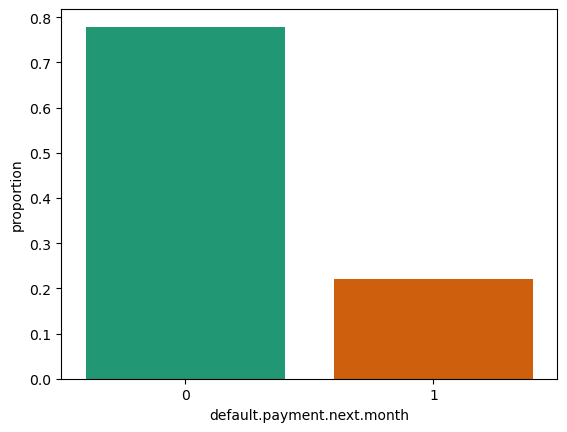

In [9]:
# plot the proportion of defaults in the whole data set
sns.countplot(data = df, x = "default.payment.next.month", stat = "proportion", palette='Dark2', saturation=.9)
print(f'{df["default.payment.next.month"].mean() * 100}% of the people are defaulters in the whole dataset.')

It seems like the data is skewed since it has much higher proportion of non-default cases.

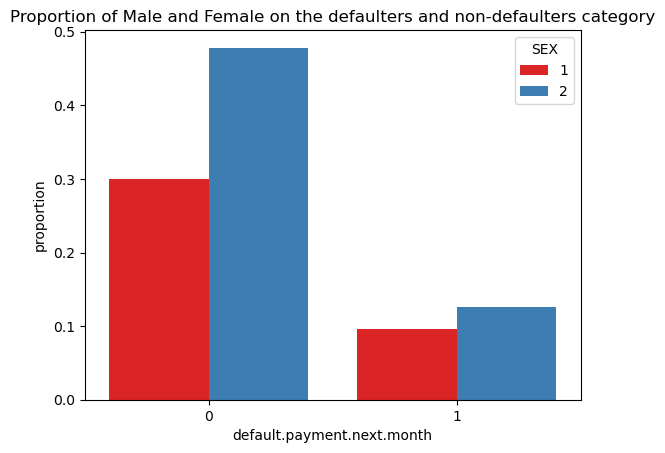

In [10]:
# Show the distribution of defaults based on Sex
sns.countplot(df, x="default.payment.next.month", hue = "SEX", palette="Set1", stat="proportion", saturation=.9)
plt.title("Proportion of Male and Female on the defaulters and non-defaulters category")
plt.show()

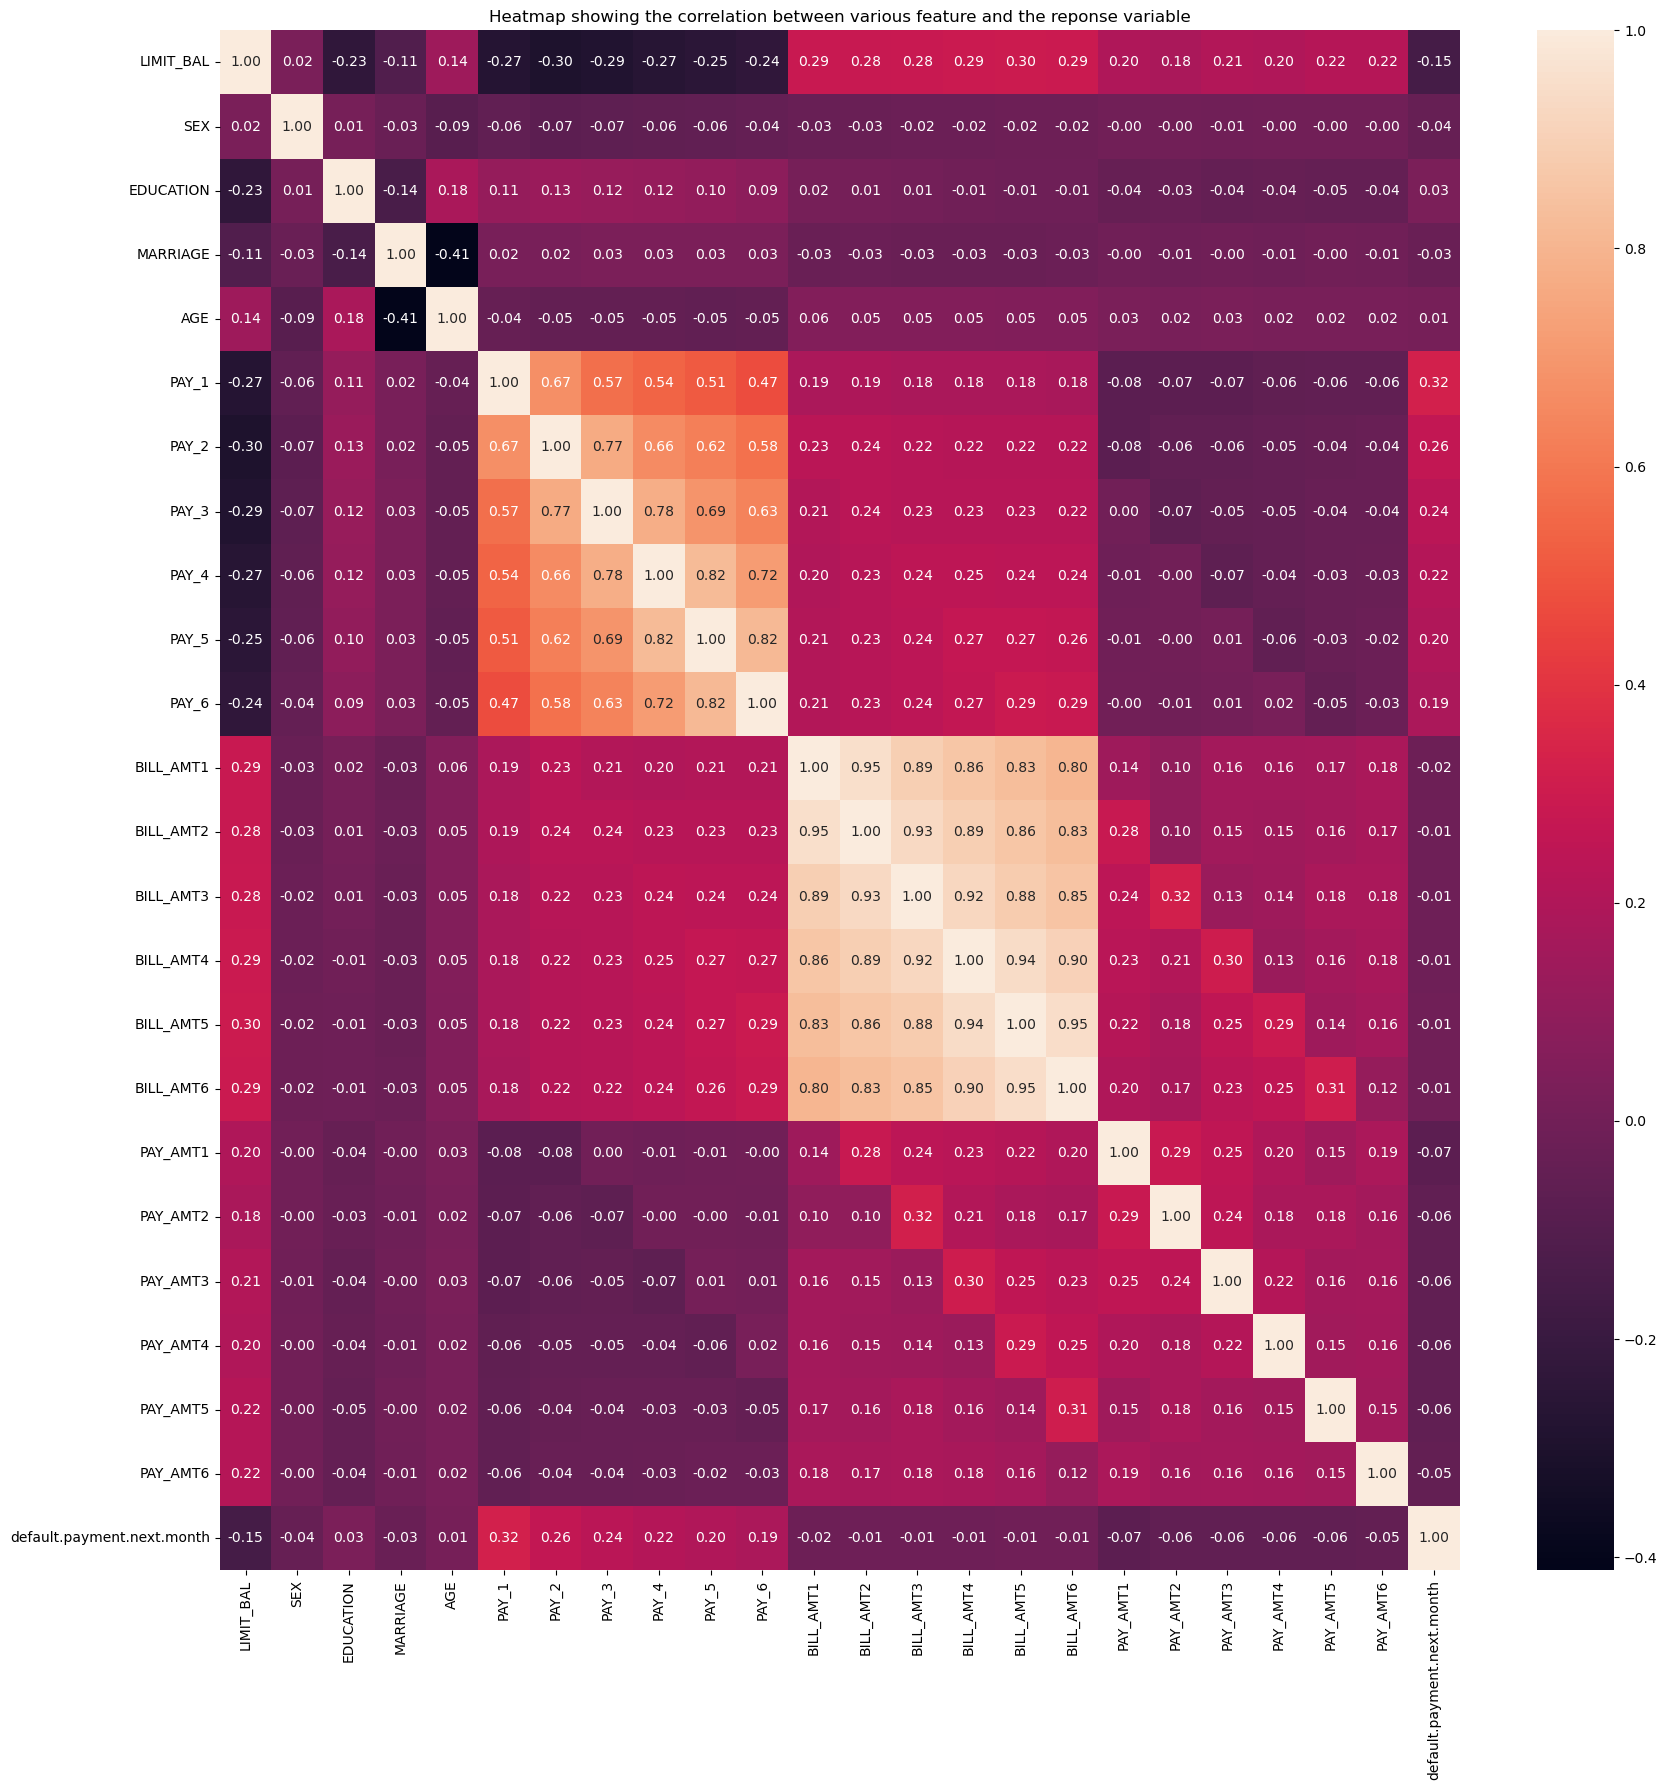

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.231088 -0.111012   
SEX                          0.024755  1.000000   0.013627 -0.028522   
EDUCATION                   -0.231088  0.013627   1.000000 -0.136797   
MARRIAGE                    -0.111012 -0.028522  -0.136797  1.000000   
AGE                          0.144713 -0.090874   0.182434 -0.412001   
PAY_1                       -0.271214 -0.057643   0.112593  0.018557   
PAY_2                       -0.296382 -0.070771   0.129703  0.023620   
PAY_3                       -0.286123 -0.066096   0.122425  0.032399   
PAY_4                       -0.267460 -0.060173   0.116531  0.031831   
PAY_5                       -0.249411 -0.055064   0.104088  0.034377   
PAY_6                       -0.235195 -0.044008   0.088986  0.033168   
BILL_AMT1                    0.285430 -0.033642   0.016597 -0.027832   
BILL_AMT2                    0.278314 -0.031183   0.011980 -0.02

In [17]:
# check the correlation between various features
cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, cbar=True, annot=True, fmt=".2f", annot_kws={'size':10},)
plt.title("Heatmap showing the correlation between various feature and the reponse variable")
plt.show()

Figure shows that:
- *'BILL_AMTX'* are highly correlated to each other but very less correlated to the target variable *'Defaulter'*.
- *'PAYX'* has the highest positive correlation to the *Defaulter*
- *'LIMIT_BAL'* has the highest negetive correlation to the *'Defaulter'*

##### 1. Is proportion of defaulters significantly different between male and female?

In [11]:
sex_crosstab = pd.crosstab(df["default.payment.next.month"], df["SEX"], margins=True)
sex_crosstab.rename(columns={1:"Male",2:"Female"}, index={0:"Non-default",1:"Default"}, inplace=True)
sex_crosstab/sex_crosstab.loc['All']*100

SEX,Male,Female,All
default.payment.next.month,,,
Non-default,75.832773,79.223719,77.88
Default,24.167227,20.776281,22.12
All,100.000000,100.000000,100.00


Observations:
- Approximately 24.16% Male are defaulted
- Approximately 20.77% Female are defaulted


Additionaly we can perform Chi-square test of indepence to check if there is significant association between Gender and Defaulter.

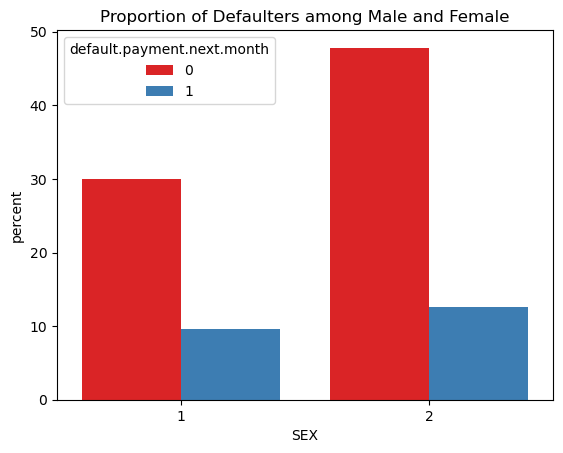

In [12]:
# Show the distribution of defaults based on Sex
sns.countplot(df, x="SEX", hue = "default.payment.next.month", palette="Set1", stat="percent", saturation=.9)
plt.title("Proportion of Defaulters among Male and Female")
plt.show()

##### 2. Does maritial status effect the proportion of defaulters?

In [13]:
sex_crosstab = pd.crosstab(df["default.payment.next.month"], df["MARRIAGE"], margins=True)
sex_crosstab.rename(columns={1:"Married",2:"Single", 3:"Others"}, index={0:"Non-default",1:"Default"}, inplace=True)
sex_crosstab/sex_crosstab.loc['All']*100

MARRIAGE,Married,Single,Others,All
default.payment.next.month,,,,
Non-default,76.528296,79.071661,76.392573,77.88
Default,23.471704,20.928339,23.607427,22.12
All,100.000000,100.000000,100.000000,100.00


The proportions of defaulters is almost same for Married and Others, slightly lesser for the Single category.

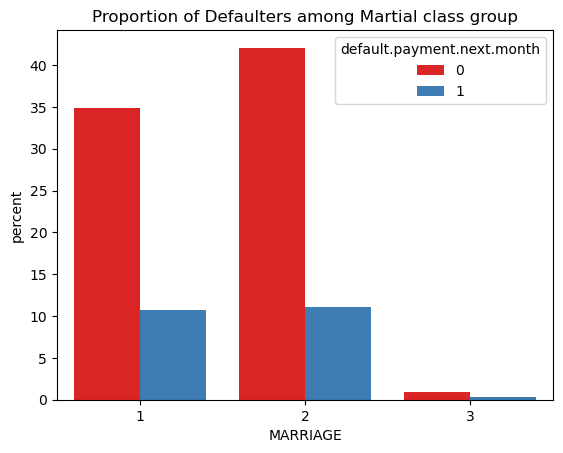

In [14]:
# Show the distribution of defaults based on Sex
sns.countplot(df, x="MARRIAGE", hue = "default.payment.next.month", palette="Set1", stat="percent", saturation=.9)
plt.title("Proportion of Defaulters among Martial class group")
plt.show()

##### 3. Does level of education play role in the proportion of defaulters?

In [15]:
ed_crosstab = pd.crosstab(df["default.payment.next.month"], df["EDUCATION"], margins=True)
ed_crosstab.rename(columns={1:"graduate school", 2:"university", 3:"high school", 4:"others"}, index={0:"Non-default",1:"Default"}, inplace=True)
ed_crosstab/ed_crosstab.loc['All']*100

EDUCATION,graduate school,university,high school,others,All
default.payment.next.month,,,,,
Non-default,80.765234,76.265146,74.842384,92.948718,77.88
Default,19.234766,23.734854,25.157616,7.051282,22.12
All,100.000000,100.000000,100.000000,100.000000,100.00


In [16]:
# Chi-sq test of Independence
chi2, p, dof, expected = chi2_contingency(ed_crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 160.40995107224546
P-value: 1.312857313478719e-30


Since the p-value is almost 0, we can conclude that there is significant association betweent he level of education and defaulting on payments.

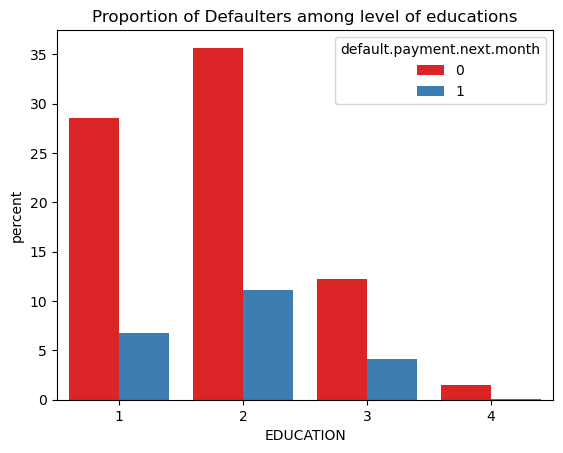

In [17]:
# Show the distribution of defaults based on Sex
sns.countplot(df, x="EDUCATION", hue = "default.payment.next.month", palette="Set1", stat="percent", saturation=.9)
plt.title("Proportion of Defaulters among level of educations")
plt.show()

### *PREDICTIVE MODELLING*

##### DATA PROCESSING

In [9]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = df.drop(["default.payment.next.month"], axis=1)
X = scaling.fit_transform(X)
y = df["default.payment.next.month"]

##### SPLITTING THE DATA SET INTO TRAIN AND TEST SETS

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=55)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, train_size=0.5, random_state=55)
del X_, y_

### RANDOM FOREST -- ENSEMBLE LEARNING

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [21]:
# selecting the hyperparameter list
min_samples_split_list = [2, 10, 30, 50, 80, 100, 200, 300, 500, 800, 1000, 1500]
max_depth_list = [10, 20, 30, 50, 70, 120, 200]
n_estimator_list = [10, 20, 50, 70, 100, 180]

    accuracy_train  accuracy_val
0         0.999500      0.814667
1         0.924611      0.815667
2         0.862667      0.820167
3         0.845722      0.820333
4         0.837667      0.820333
5         0.834000      0.819667
6         0.825556      0.820500
7         0.823167      0.821167
8         0.822222      0.819500
9         0.821278      0.820333
10        0.821778      0.819667
11        0.821056      0.819667


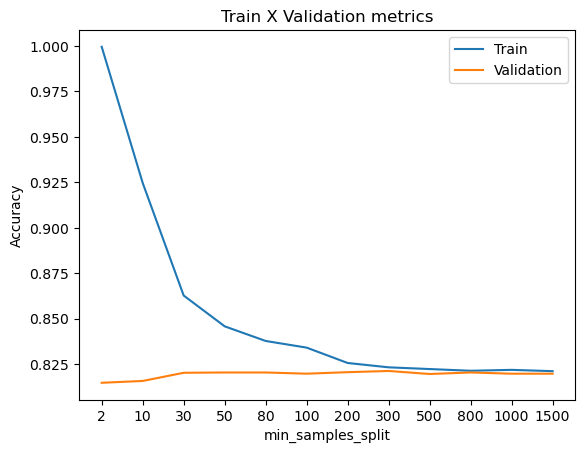

In [22]:
# getting the best min_samples_split
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split, random_state=55, n_jobs=-1, verbose = 0).fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Train X Validation metrics")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.xticks(ticks = range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.legend(['Train','Validation'])

print(pd.DataFrame({"accuracy_train":accuracy_list_train, "accuracy_val":accuracy_list_val}))

Note increasing the min_samples_split reduces the overfitting though it doesn't increased validation accuracy after 500.

So, we will set the min_sample_split = 500

   max_depth  accuracy_train  accuracy_val
0         10        0.861778      0.820500
1         20        0.955444      0.815667
2         30        0.998556      0.816167
3         50        0.999500      0.815500
4         70        0.999500      0.814667
5        120        0.999500      0.814667
6        200        0.999500      0.814667


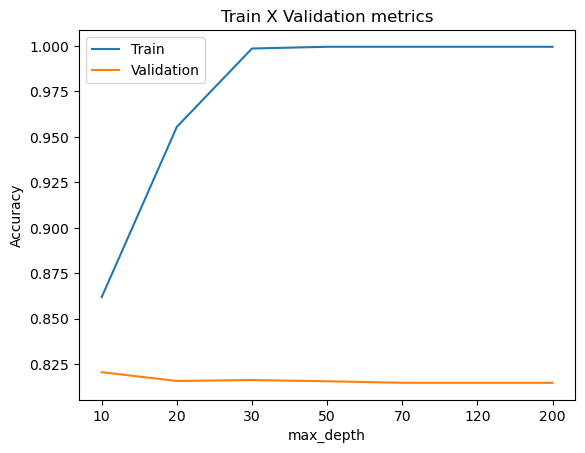

In [23]:
# getting the best max_dept
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth, random_state=55, n_jobs=-1, verbose = 0).fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Train X Validation metrics")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.legend(['Train','Validation'])

print(pd.DataFrame({"max_depth":max_depth_list,"accuracy_train":accuracy_list_train, "accuracy_val":accuracy_list_val}))

Note that reducing the max_depth can help to reduce overfitting. After max_dept = 20, the validation accuracy is decreasing and the training accuracy is rapidly increasing implying overfitting.

So, we set max_dept at 20.

   max_depth  accuracy_train  accuracy_val
0         10        0.981667      0.806500
1         20        0.992889      0.810333
2         50        0.998889      0.813000
3         70        0.999444      0.813833
4        100        0.999500      0.814667
5        180        0.999500      0.817500


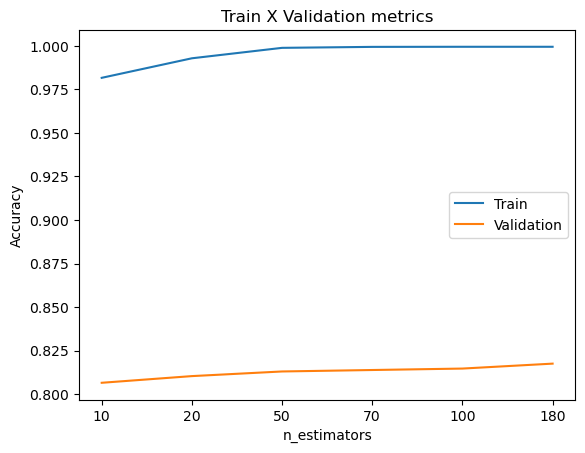

In [24]:
# getting the best number of trees
accuracy_list_train = []
accuracy_list_val = []
for n_estimator in n_estimator_list:
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=55, n_jobs=-1, verbose = 0).fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_val = model.predict(X_val)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_val = accuracy_score(prediction_val, y_val)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.title("Train X Validation metrics")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.xticks(ticks = range(len(n_estimator_list)),labels=n_estimator_list)
plt.legend(['Train','Validation'])

print(pd.DataFrame({"max_depth":n_estimator_list,"accuracy_train":accuracy_list_train, "accuracy_val":accuracy_list_val}))

Lets then fit a random forest with the following parameters:
 - max_depth: 20
 - min_samples_split: 500
 - n_estimators: 100

In [25]:
# Final Model
random_forest_model = RandomForestClassifier(n_estimators=100, criterion="entropy",min_samples_split=500, max_depth=20, 
                                             n_jobs=-1, verbose=0).fit(X_train, y_train)

In [26]:
print(f"Train Accuracy Score : {accuracy_score(random_forest_model.predict(X_train), y_train):.4f} \nValidation Accuracy Score : {accuracy_score(random_forest_model.predict(X_val), y_val):.4f}")
print(f"\nGeneralised Accuracy Score : {accuracy_score(random_forest_model.predict(X_test), y_test):.4f}")

Train Accuracy Score : 0.8219 
Validation Accuracy Score : 0.8205

Generalised Accuracy Score : 0.8192


In [27]:
print(confusion_matrix(y_test, random_forest_model.predict(X_test)))
print(f"Precision score : {precision_score(y_test, random_forest_model.predict(X_test)):.4f}")
print(f"Recall score : {recall_score(y_test, random_forest_model.predict(X_test)):.4f}")

[[4451  235]
 [ 850  464]]
Precision score : 0.6638
Recall score : 0.3531


### XGBOOST -- Boosting Algorithm

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [30]:
params = {
    "learning_rate"    : [0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21],
    "max_depth"        : [3, 5, 8, 10, 12, 15, 20, 25],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "min_child_weight" : [1, 3, 5, 7],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.6, 0.7],
    "reg_lambda"       : [0., 0.4, 0.6, 0.8, 1.0],
    "reg_alpha"        : [0., 0.4, 0.6, 0.8, 1.0],
    "scale_pos_weight" : [3,3.2, 3.5, 3.8, 4] # [(# -ve example)/(# +ve example)]
}

In [43]:
classifier = XGBClassifier(random_state = 45)
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5, scoring="roc_auc", cv=5, verbose=1)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.06, 0.09,
                                                          0.12, 0.15, 0.18,
                                                          0.21],
                                        'max_depth': [3, 5, 8, 10, 12, 15, 20,
                                                      25],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'reg_alpha': [0.0, 0.4, 0.6, 0.8, 1.0],
                                        'reg_lambda': [0.0, 0.4, 0.6, 0.8, 1.0],
                                        'scale_pos_weight': [3, 3.2, 3.5, 3.8,
                                                             4]},
                   scoring='roc_auc', verbose=1)

In [36]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.21, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=45, ...)

In [37]:
# on train data set
classifier_XG = XGBClassifier(base_score=None, booster="gbtree", callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.21, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=5, random_state=45)

# on full data set
classifier = XGBClassifier(base_score=None, booster="gbtree", callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=5, random_state=45)

In [38]:
xg_score = cross_val_score(classifier_XG, X, y, cv = 5)
xg_score.mean()

0.8206666666666667

In [39]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=45, ...)

In [41]:
print(f"\nGeneralised Accuracy Score : {accuracy_score(classifier.predict(X_test), y_test):.4f}")


Generalised Accuracy Score : 0.8142


In [42]:
print(confusion_matrix(y_test, classifier.predict(X_test)))
print(precision_score(y_test, classifier.predict(X_test)))
print(recall_score(y_test, classifier.predict(X_test)))

[[4402  284]
 [ 831  483]]
0.6297262059973925
0.3675799086757991


### Neural Networks

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [12]:
# define various models

def build_models():
    
    tf.random.set_seed(45)
    
    model_1 = Sequential(
        [
            tf.keras.Input(shape=(23,)),
            Dense(units = 16, activation = "relu"),
            Dense(units = 12, activation = "relu"),
            Dense(units = 8, activation = "relu"),
            Dense(units = 4, activation = "relu"),
            Dense(units = 1, activation = "linear")
        ], name = "Model_1"
    )
    
    model_2 = Sequential(
        [
            tf.keras.Input(shape=(23,)),
            Dense(units = 25, activation = "relu"),
            Dense(units = 15, activation = "relu"),
            Dense(units = 5, activation = "relu"),
            Dense(units = 1, activation = "linear")
        ], name = "Model_2"
    )
    
    model_3 = Sequential(
        [
            tf.keras.Input(shape=(23,)),
            Dense(units = 8, activation = "relu"),
            Dense(units = 8, activation = "relu"),
            Dense(units = 4, activation = "relu"),
            Dense(units = 1, activation = "linear")
        ], name = "Model_3"
    )
    
    model_4 = Sequential(
        [
            tf.keras.Input(shape=(23,)),
            Dense(units = 20, activation = "relu"),
            Dense(units = 15, activation = "relu"),
            Dense(units = 10, activation = "relu"),
            Dense(units = 5, activation = "relu"),
            Dense(units = 1, activation = "linear")
        ], name = "Model_4"
    )

    model_5 = Sequential(
        [
            tf.keras.Input(shape=(23,)),
            Dense(units = 12, activation = "relu"),
            Dense(units = 8, activation = "relu"),
            Dense(units = 8, activation = "relu"),
            Dense(units = 4, activation = "relu"),
            Dense(units = 1, activation = "linear")
        ], name = "Model_5"
    )
    
    model_list = [model_1, model_2, model_3,model_4, model_5]

    return model_list

In [13]:
train_accuracy = []
val_accuracy = []
model_info = []

nn_models = build_models()

for model in nn_models:
    
    model.compile(
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=[tf.keras.metrics.BinaryAccuracy()],
    )

    print(f"Training {model.name}...")

    # train the model
    model_info.append(model.fit(
        X_train, y_train, epochs = 200, verbose = 2, validation_data = (X_val, y_val), 
    ))

    #plt.plot(model_info[].history['loss'])

    print("Done!\n")

    

Training Model_1...
Epoch 1/200
563/563 - 8s - loss: 0.4680 - binary_accuracy: 0.7778 - val_loss: 0.4606 - val_binary_accuracy: 0.7795 - 8s/epoch - 14ms/step
Epoch 2/200
563/563 - 4s - loss: 0.4447 - binary_accuracy: 0.7907 - val_loss: 0.4470 - val_binary_accuracy: 0.8058 - 4s/epoch - 8ms/step
Epoch 3/200
563/563 - 4s - loss: 0.4406 - binary_accuracy: 0.8159 - val_loss: 0.4435 - val_binary_accuracy: 0.8175 - 4s/epoch - 8ms/step
Epoch 4/200
563/563 - 4s - loss: 0.4390 - binary_accuracy: 0.8184 - val_loss: 0.4422 - val_binary_accuracy: 0.8222 - 4s/epoch - 8ms/step
Epoch 5/200
563/563 - 4s - loss: 0.4355 - binary_accuracy: 0.8175 - val_loss: 0.4424 - val_binary_accuracy: 0.8193 - 4s/epoch - 7ms/step
Epoch 6/200
563/563 - 4s - loss: 0.4357 - binary_accuracy: 0.8174 - val_loss: 0.4423 - val_binary_accuracy: 0.8190 - 4s/epoch - 7ms/step
Epoch 7/200
563/563 - 4s - loss: 0.4345 - binary_accuracy: 0.8181 - val_loss: 0.4395 - val_binary_accuracy: 0.8153 - 4s/epoch - 7ms/step
Epoch 8/200
563/563 

In [24]:
# check the physical device using
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

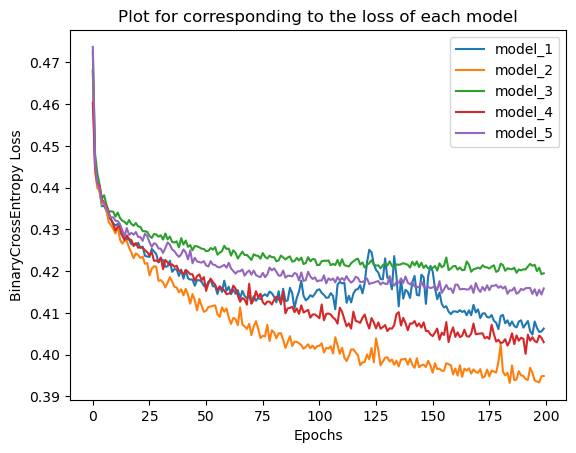

In [14]:
# PLot for the loss 
for i in range(len(model_info)):
    plt.plot(model_info[i].history['loss'], label=f"model_{i+1}")
plt.title("Plot for corresponding to the loss of each model")
plt.xlabel("Epochs")
plt.ylabel("BinaryCrossEntropy Loss")
plt.legend()
plt.show()

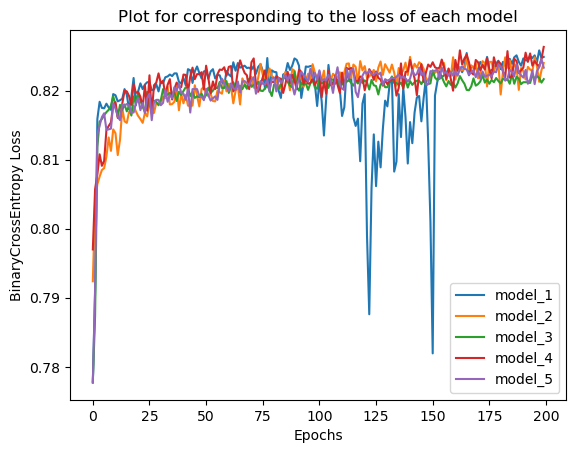

In [15]:
# PLot for the train accuracy 
for i in range(len(model_info)):
    plt.plot(model_info[i].history['binary_accuracy'], label=f"model_{i+1}")
plt.title("Plot for corresponding to the loss of each model")
plt.xlabel("Epochs")
plt.ylabel("BinaryCrossEntropy Loss")
plt.legend()
plt.show()

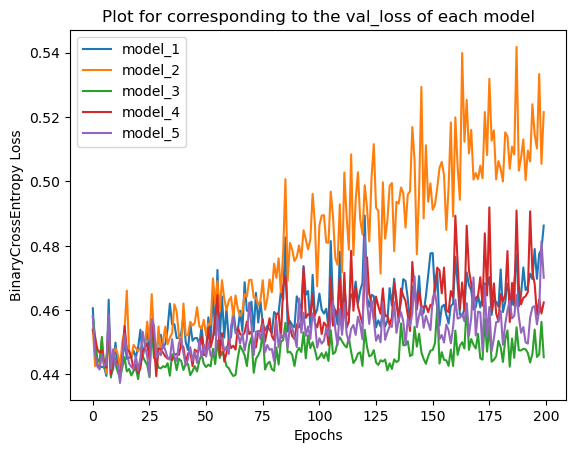

In [19]:
# PLot for the train accuracy 
for i in range(len(model_info)):
    plt.plot(model_info[i].history["val_loss"], label=f"model_{i+1}")
plt.title("Plot for corresponding to the val_loss of each model")
plt.xlabel("Epochs")
plt.ylabel("BinaryCrossEntropy Loss")
plt.legend()
plt.show()

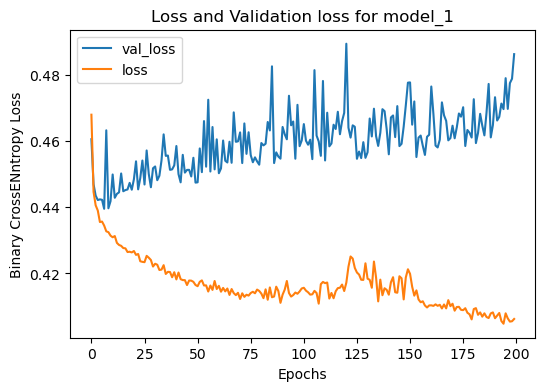

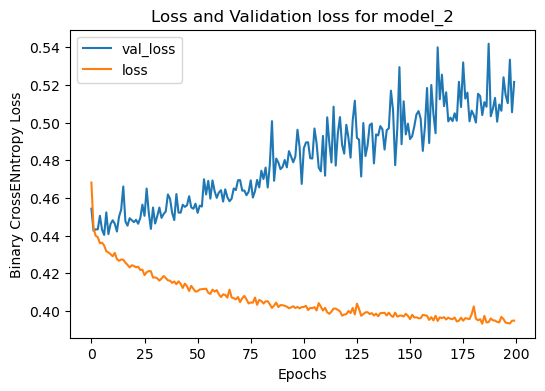

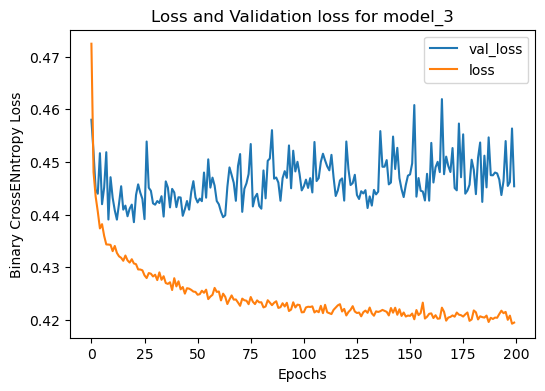

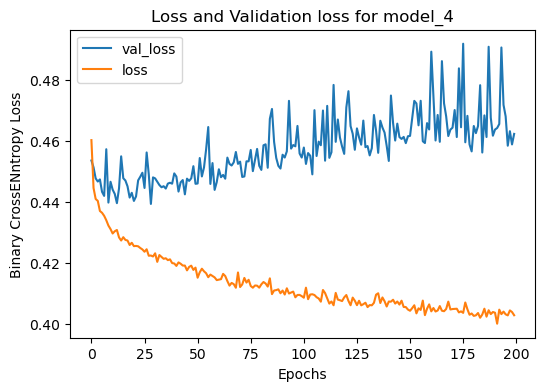

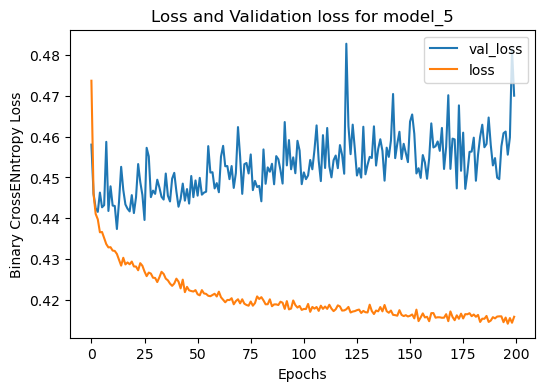

In [35]:
# plotting the loss vs val_loss for each model
for i in range(len(model_info)):
    plt.figure(figsize=(6,4))
    plt.plot(model_info[i].history["val_loss"], label = 'val_loss')
    plt.plot(model_info[i].history["loss"], label = 'loss')
    plt.legend()
    plt.title(f"Loss and Validation loss for model_{i+1}")
    plt.xlabel("Epochs")
    plt.ylabel("Binary CrossENntropy Loss")
    plt.show()

In [47]:
print("Train Accuracy      ","Test Accuracy" )
print(model_info[0].history['binary_accuracy'][-1],model_info[0].history['val_binary_accuracy'][-1])
print(model_info[1].history['binary_accuracy'][-1],model_info[1].history['val_binary_accuracy'][-1])
print(model_info[2].history['binary_accuracy'][-1],model_info[2].history['val_binary_accuracy'][-1])
print(model_info[3].history['binary_accuracy'][-1],model_info[3].history['val_binary_accuracy'][-1])
print(model_info[4].history['binary_accuracy'][-1],model_info[4].history['val_binary_accuracy'][-1])




Train Accuracy       Test Accuracy
0.8248888850212097 0.815666675567627
0.8240000009536743 0.8080000281333923
0.8216666579246521 0.8181666731834412
0.8263333439826965 0.8146666884422302
0.8233333230018616 0.8166666626930237


So, we conclude that model3 is the best model since in this case the difference between the train accuracy and val accuracy. In other cases, the gap between the val accuracy and train accuracy is higher which might be indication of overfitting.

In [51]:
nn_final_model = nn_models[2]
result = nn_final_model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

: 